<a href="https://colab.research.google.com/github/Ganesh7134/Restaurant-Rating-Prediction-and-Recommendation-System/blob/main/cognifyz_internship_tasks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# to avoid plt.show multiple times by using this we dont need to write again...
%matplotlib inline
sns.set(color_codes = True) # to apply seaborn standard color code to the plots

## **Task - 1**: Predict Restaurent Ratings

###  **Objective**: Build a machine learning model to predict the aggregate rating of a restaurent based on other features.

In [ ]:
df = pd.read_csv(r"D:\internships\ML intern\Dataset .csv")
df.head()

Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM Megamall, Ortigas, Mandaluyong City   
4      SM Megamall, Ortigas, Mandaluyong City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   
2  Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831  14.581404   
3  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475  14.585318   
4  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508  14.584450   

                           Cuisines  ...          Currency Has Table booking  \
0        French, Japanese, Desserts  ...  Botswana Pula(P)               Yes   
1                          Japanese  ...  Botswana Pula(P)               Yes   
2  Seafood, Asian, Filipino, Indian  ...  Botswana Pula(P)               Yes   
3                   Japanese, Sushi  ...  Botswana Pula(P)                No   
4                  Japanese, Korean  ...  Botswana Pula(P)               Yes   

  Has Online delivery Is delivering now Switch to order menu Price range  \
0                  No                No                   No           3   
1                  No                No                   No           3   
2                  No                No                   No           4   
3                  No                No                   No           4   
4                  No                No                   No           4   

   Aggregate rating  Rating color Rating text Votes  
0               4.8    Dark Green   Excellent   314  
1               4.5    Dark Green   Excellent   591  
2               4.4         Green   Very Good   270  
3               4.9    Dark Green   Excellent   365  
4               4.8    Dark Green   Excellent   229  

[5 rows x 21 columns]

In [ ]:
df.shape

(9551, 21)

In [ ]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

###  **Step-1** : Dataset understanding
***
* **Restaurent_id** : A unique identifier for each restaurent.
* **Restaurent_name** : The name of the restaurent.
* **Country Code** : The code representing the country where the restaurent is located.
* **City** : The city where the restaurent is located.
* **Address** : The complete address of the restaurent.
* **Locality** : the specific area or neighborhood where the restaurent is situated.
* **Locality verbose** : a more detailed description of the restaurent's locality.
* **Longitude** : The longitudinal coordinate of the restaurent's location.
* **Latitude** : The latitudinal coordinate of the restaurent's location.
* **Cuisines** : The types or styles of food offered by the restaurent ( for example , italian , Chinese , indian ).
* **Average cost for two** : The average cost for a meal for two people.
* **Currency** : The currency used for the restaurent's pricing.
* **Has table booking** : indicates whether the restaurent offers table reservations (Yes/No).
* **Has online delivery** : indicates whether the restaurent provides online delivery services (Yes/No).
* **Switch to order menu** : indicates if the restaurent has a separate menu for online orders (Yes/No).
* **Price range** : The price range category of the restaurent (usually a numeric value).
* **Aggregate rating** : The average rating given to the restaurent by users.
* **Rating color** : The color code representing the rating category (often used in visualizations).
* **Rating text** : The textual description of the rating ( example , Excellent , Good , Poor ).
* **Votes** : The number of reviews received by the restaurent.

## **Step-2**: preprocess the data

In [ ]:
df.isna().sum() # only 9 missing values are there we can remove them.

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isna().sum() # now we can move to the next step

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [ ]:
for col in df.select_dtypes("object").columns:
  print(f"{col} has {df[col].nunique()} unique catergories in it")
  print("-"*80)

Restaurant Name has 7437 unique catergories in it
--------------------------------------------------------------------------------
City has 140 unique catergories in it
--------------------------------------------------------------------------------
Address has 8910 unique catergories in it
--------------------------------------------------------------------------------
Locality has 1206 unique catergories in it
--------------------------------------------------------------------------------
Locality Verbose has 1263 unique catergories in it
--------------------------------------------------------------------------------
Cuisines has 1825 unique catergories in it
--------------------------------------------------------------------------------
Currency has 12 unique catergories in it
--------------------------------------------------------------------------------
Has Table booking has 2 unique catergories in it
----------------------------------------------------------------------------

###  **Statistical_info of dataset**

In [ ]:
df.describe().T # it gives statistical info of numerical columns
# if mean is greater than median then data is positively skewed in reverse it is negatively skewed

count          mean           std         min  \
Restaurant ID         9542.0  9.043301e+06  8.791967e+06   53.000000   
Country Code          9542.0  1.817921e+01  5.645160e+01    1.000000   
Longitude             9542.0  6.427500e+01  4.119760e+01 -157.948486   
Latitude              9542.0  2.584853e+01  1.101009e+01  -41.330428   
Average Cost for two  9542.0  1.200326e+03  1.612874e+04    0.000000   
Price range           9542.0  1.804968e+00  9.055631e-01    1.000000   
Aggregate rating      9542.0  2.665238e+00  1.516588e+00    0.000000   
Votes                 9542.0  1.567721e+02  4.302033e+02    0.000000   

                                25%           50%           75%           max  
Restaurant ID         301931.250000  6.002726e+06  1.835260e+07  1.850065e+07  
Country Code               1.000000  1.000000e+00  1.000000e+00  2.160000e+02  
Longitude                 77.081565  7.719203e+01  7.728204e+01  1.748321e+02  
Latitude                  28.478658  2.857044e+01  2.864271e+01  5.597698e+01  
Average Cost for two     250.000000  4.000000e+02  7.000000e+02  8.000000e+05  
Price range                1.000000  2.000000e+00  2.000000e+00  4.000000e+00  
Aggregate rating           2.500000  3.200000e+00  3.700000e+00  4.900000e+00  
Votes                      5.000000  3.100000e+01  1.300000e+02  1.093400e+04

###  **Complete_info about dataset**

In [ ]:
df.info() # along with not-null count , column and datatype , total entries

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9542 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9542 non-null   int64  
 1   Restaurant Name       9542 non-null   object 
 2   Country Code          9542 non-null   int64  
 3   City                  9542 non-null   object 
 4   Address               9542 non-null   object 
 5   Locality              9542 non-null   object 
 6   Locality Verbose      9542 non-null   object 
 7   Longitude             9542 non-null   float64
 8   Latitude              9542 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9542 non-null   int64  
 11  Currency              9542 non-null   object 
 12  Has Table booking     9542 non-null   object 
 13  Has Online delivery   9542 non-null   object 
 14  Is delivering now     9542 non-null   object 
 15  Switch to order menu 

###  **Let's do some Exploratory Data Analytics**

1.**Distribution of Restaurents Across Cities**
***
understand which what are the top-5 cities having highest number of restaurents
             

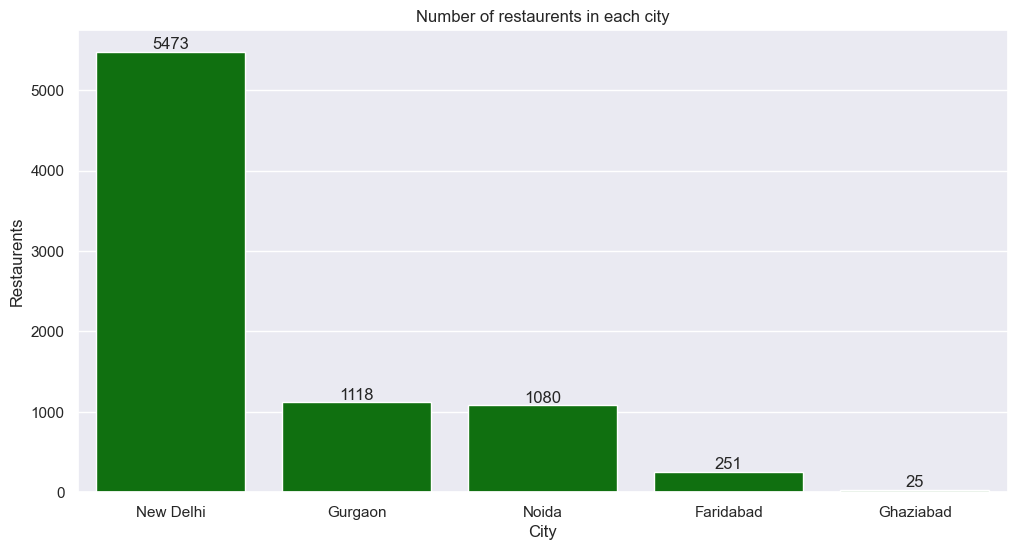

In [ ]:
city_counts = df["City"].value_counts().sort_values(ascending=False)[:5].to_dict() # to filter Top - 5 cities having more number of restaurents converted into dictionary format

# # plot
plt.figure(figsize=(12,6))
sns.barplot(city_counts,color="Green")
plt.title("Number of restaurents in each city")
plt.xlabel("City")
plt.ylabel("Restaurents")

for index , value in enumerate(city_counts.values()): # here we are iterating counts with index and passed wot plt.text to display the on the top of the bar
  plt.text(index,value , str(value) ,ha="center",va="bottom")


2.**Top-20 popular cuisines [ type of the food ]**
***
understanding what are the Top-20 popular cuisines

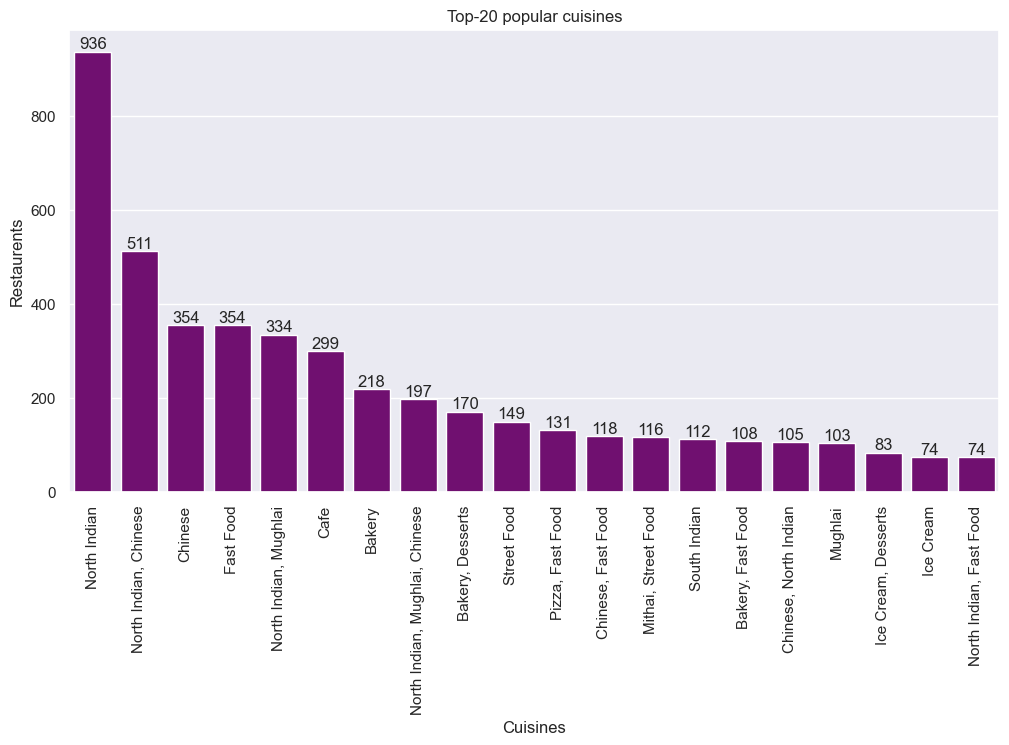

In [ ]:
top_20_cuisines = df["Cuisines"].value_counts()[:20].to_dict()

plt.figure(figsize=(12,6))

sns.barplot(top_20_cuisines , color = "purple")

plt.title("Top-20 popular cuisines")
plt.xlabel("Cuisines")
plt.ylabel("Restaurents")
plt.xticks(rotation=90)

for index , val in enumerate(top_20_cuisines.values()):
  plt.text(index , val ,str(val),ha="center",va="bottom")

3.**Table booking**
***
verifying how much percent of restaurents are provided table booking

<Axes: ylabel='Has Table booking'>

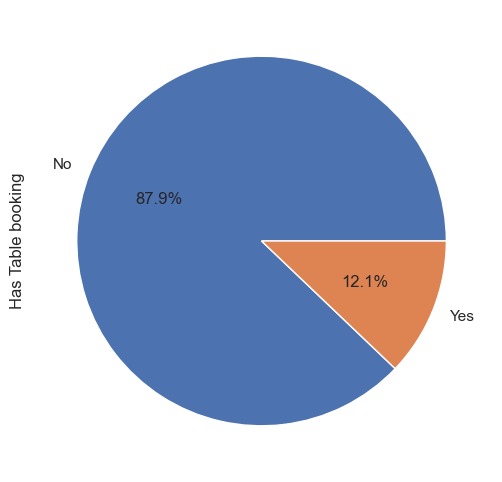

In [ ]:
table_booking = df["Has Table booking"].value_counts()

plt.figure(figsize=(12,6))

table_booking.plot(kind = "pie" , autopct="%.1f%%")

4.**Online delivery**
***
Verifying how much percentage of restaurents are provided online delivery service

<Axes: ylabel='Is delivering now'>

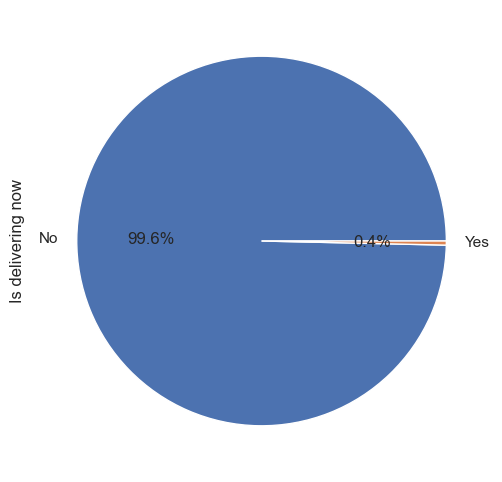

In [ ]:
online_delivery = df["Is delivering now"].value_counts()

plt.figure(figsize=(12,6))

online_delivery.plot(kind="pie",autopct="%.1f%%")

5.**Top-5 restaurents based on ratings and cuisines**

C:\Users\GANESH\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 65533 (\N{REPLACEMENT CHARACTER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


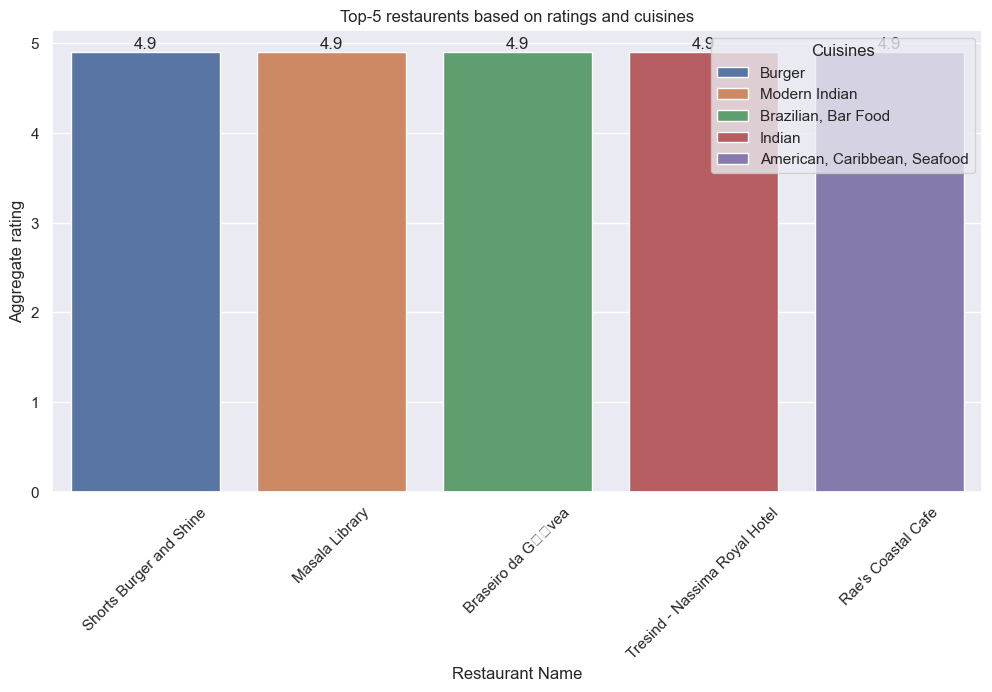

In [ ]:
Grouped_df = df.groupby(["Restaurant Name","Cuisines"])["Aggregate rating"].mean().sort_values(ascending=False)[:5].reset_index()

plt.figure(figsize=(12,6))
fig = sns.barplot(
    Grouped_df,
    x = "Restaurant Name",
    y = "Aggregate rating",
    hue = "Cuisines"
)

for i in fig.containers:
  fig.bar_label(i)


plt.xticks(rotation=45)
plt.title("Top-5 restaurents based on ratings and cuisines")
plt.show()



###  **Let's plot the distributions of each numeric column**

**Note**: skew values greater than **0.5** is **Positively skewed** or less than **-0.5** is **negatively skewed**

> for unique representing values like **Restaurent_ID , Country_code , latitude , longitude** we dont need to apply transformations .

Restaurant ID
0.06348553572782442


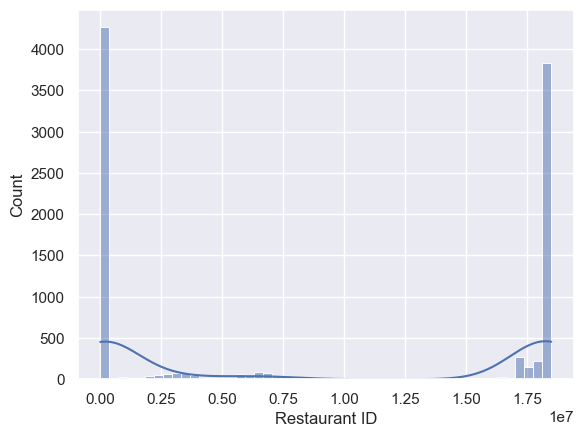

Country Code
3.0644399062264838


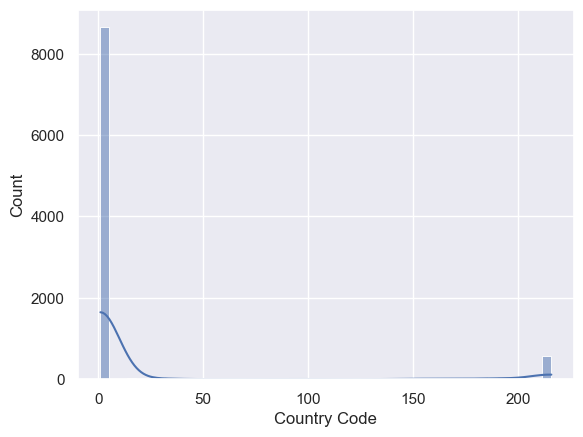

Longitude
-2.8193848766495058


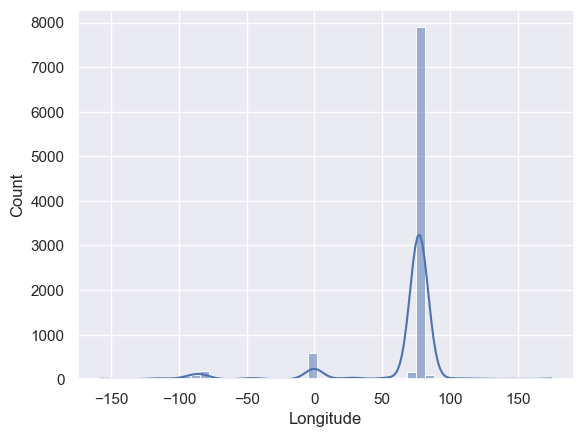

Latitude
-3.0812954440144082


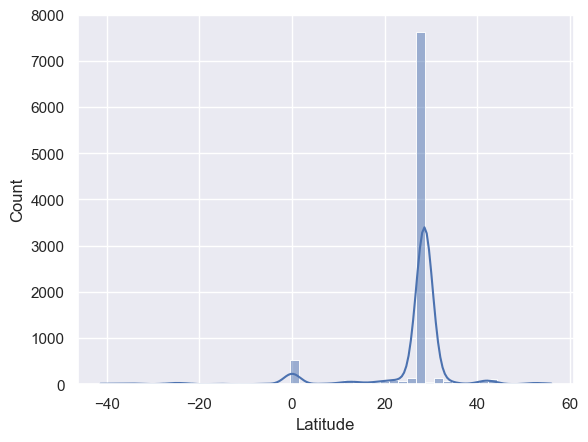

Average Cost for two
35.455688782841825


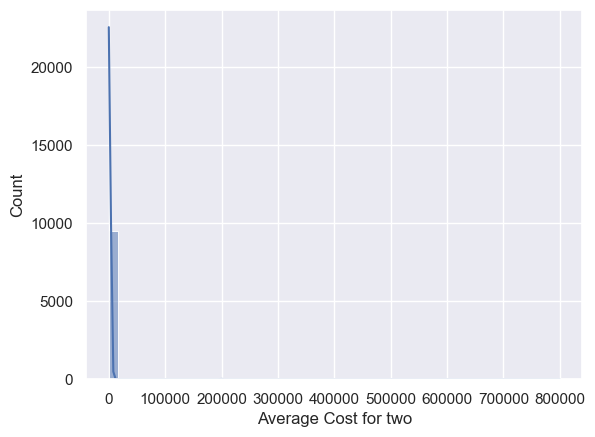

Price range
0.8897388085906884


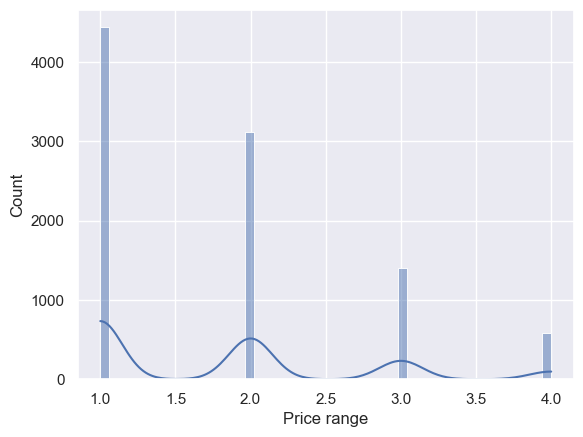

Aggregate rating
-0.9529023128493461


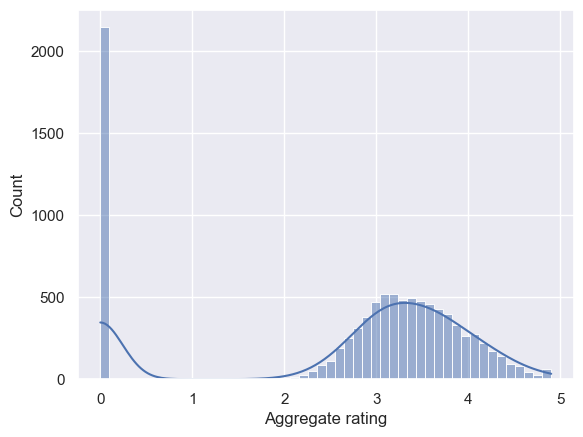

Votes
8.811884592858666


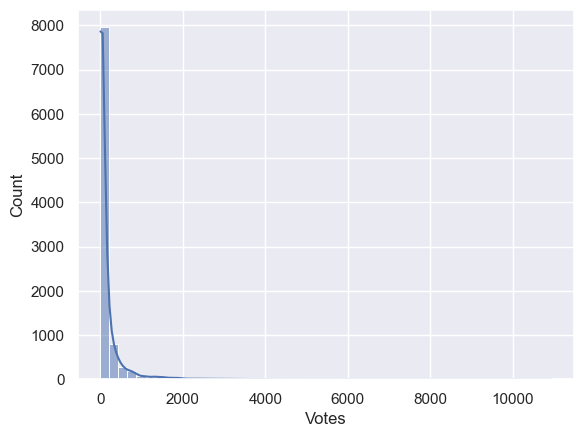

In [ ]:
from scipy.stats import skew

for col in df.select_dtypes(np.number):
  print(col)
  print(skew(df[col]))
  plt.figure()
  sns.histplot(df[col],bins=50,kde=True)
  plt.show()

In [ ]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [ ]:
trans = df[["Average Cost for two","Price range","Aggregate rating","Votes"]]
trans

Average Cost for two  Price range  Aggregate rating  Votes
0                     1100            3               4.8    314
1                     1200            3               4.5    591
2                     4000            4               4.4    270
3                     1500            4               4.9    365
4                     1500            4               4.8    229
...                    ...          ...               ...    ...
9546                    80            3               4.1    788
9547                   105            3               4.2   1034
9548                   170            4               3.7    661
9549                   120            4               4.0    901
9550                    55            2               4.0    591

[9542 rows x 4 columns]

In [ ]:
# checking whether columns containing ant negative or null values because that will impact on transforming the data
con1 = trans["Average Cost for two"] <= 0
print(con1.sum())
trans.loc[con1,"Average Cost for two"] = np.nan

con2 = trans["Price range"] <= 0
print(con2.sum())
trans.loc[con2,"Price range"] = np.nan

con3 = trans["Aggregate rating"] <= 0
print(con3.sum())
trans.loc[con3 , "Aggregate rating"] = 1 # here we are replaced 0 with 1 to avoid the conflicts raised in transforming data

con4 = trans["Votes"] <= 0
print(con4.sum())
trans.loc[con4 , "Votes"] = 1 # same thing instead of 0 votes we just 1 vote to avoid conflicts in transforming data


15
0
2148
1094


In [ ]:
trans.isna().sum()

Average Cost for two    15
Price range              0
Aggregate rating         0
Votes                    0
dtype: int64

In [ ]:
import warnings

warnings.filterwarnings("ignore")

In [ ]:
trans.fillna(trans["Average Cost for two"].median() , inplace=True)

In [ ]:
trans.isna().sum()

Average Cost for two    0
Price range             0
Aggregate rating        0
Votes                   0
dtype: int64

###  **Now , we can apply transformations**

In [ ]:
# for negative skewed ones squared transformations to reduce negative skewness
# for positive skewed ones we can use logarithic , squared , box-cox transformations

trans["Aggregate_rating_squared"] = trans["Aggregate rating"] ** 2
trans["Price_range_log"] = np.log(trans["Price range"])
trans["Average_Cost_for_two_log"] = np.log(trans["Average Cost for two"])
trans["Votes_log"] = np.log(trans["Votes"])

> on seeing the skewness after transformations all are formed **Normal distribution** means all the data now fitted between lower and upper tails.

Aggregate_rating_squared
-0.0859620885809752


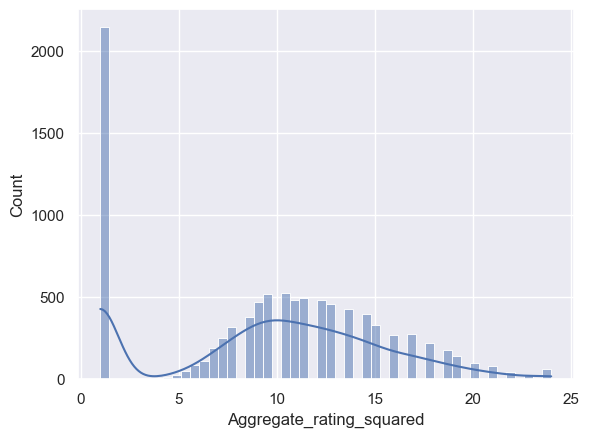

Price_range_log
0.33894664001751074


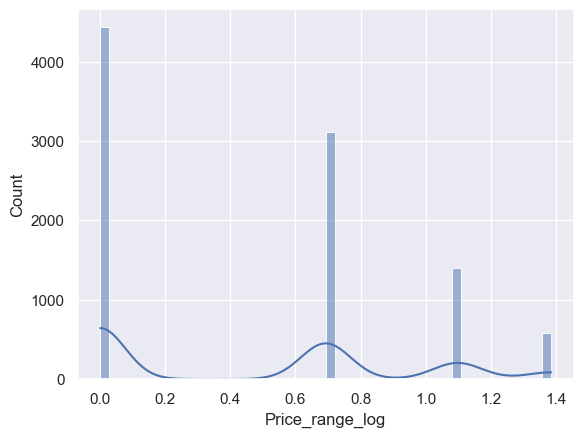

Average_Cost_for_two_log
-0.4007527120439254


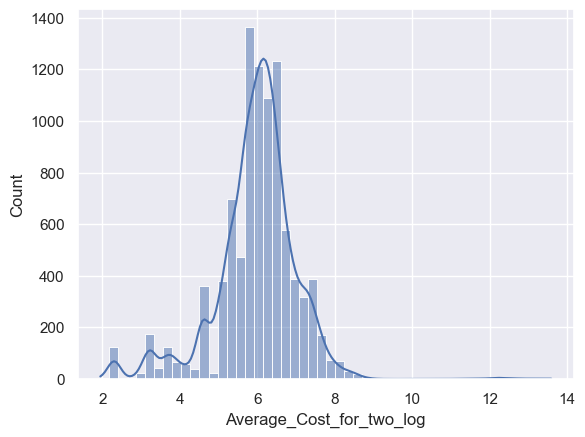

Votes_log
-0.051586575896920346


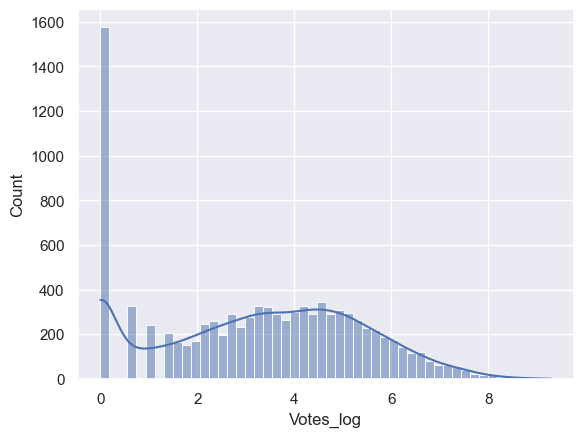

In [ ]:
plot = trans[["Aggregate_rating_squared","Price_range_log","Average_Cost_for_two_log","Votes_log"]]

for col in plot.columns:
  print(col)
  print(skew(plot[col]))
  plt.figure()
  sns.histplot(plot[col],bins=50,kde=True)
  plt.show()

In [ ]:
df = pd.concat([df,plot],axis=1)

In [ ]:
df.head()

Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM Megamall, Ortigas, Mandaluyong City   
4      SM Megamall, Ortigas, Mandaluyong City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   
2  Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831  14.581404   
3  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475  14.585318   
4  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508  14.584450   

                           Cuisines  ...  Switch to order menu Price range  \
0        French, Japanese, Desserts  ...                    No           3   
1                          Japanese  ...                    No           3   
2  Seafood, Asian, Filipino, Indian  ...                    No           4   
3                   Japanese, Sushi  ...                    No           4   
4                  Japanese, Korean  ...                    No           4   

  Aggregate rating Rating color Rating text Votes  Aggregate_rating_squared  \
0              4.8   Dark Green   Excellent   314                     23.04   
1              4.5   Dark Green   Excellent   591                     20.25   
2              4.4        Green   Very Good   270                     19.36   
3              4.9   Dark Green   Excellent   365                     24.01   
4              4.8   Dark Green   Excellent   229                     23.04   

   Price_range_log Average_Cost_for_two_log Votes_log  
0         1.098612                 7.003065  5.749393  
1         1.098612                 7.090077  6.381816  
2         1.386294                 8.294050  5.598422  
3         1.386294                 7.313220  5.899897  
4         1.386294                 7.313220  5.433722  

[5 rows x 25 columns]

### **Pairplot of rating text with respect to Aggregate_rating , price_range , Average_cost_of_two , Votes**
***
understand how the rating_text is varying based on Aggregate_rating , price_range , Average_cost_of_two , Votes

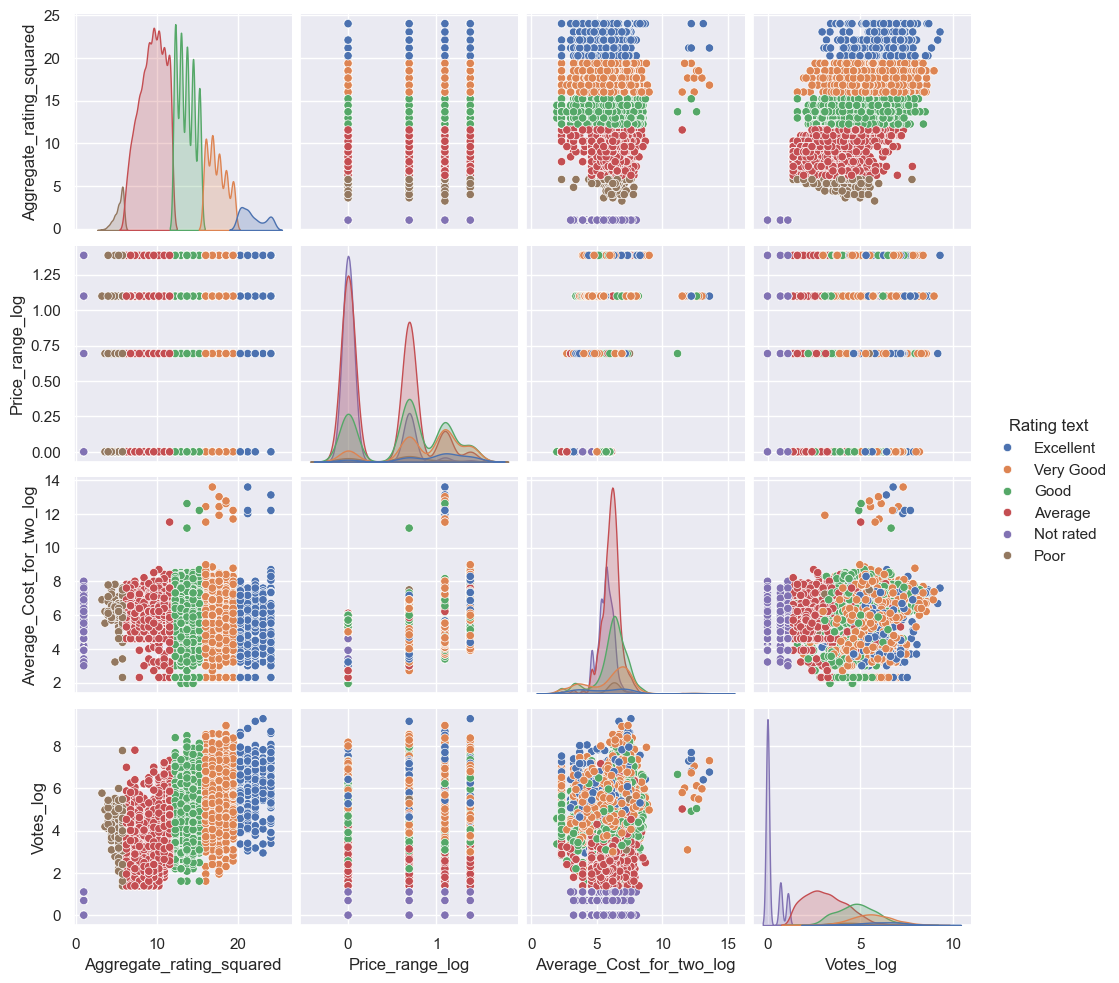

In [ ]:
plot = df[["Aggregate_rating_squared","Price_range_log","Average_Cost_for_two_log","Votes_log","Rating text"]]
sns.pairplot(plot,kind="scatter",hue="Rating text")

### **Pairplot of rating color with respect to Aggregate_rating , price_range , Average_cost_of_two , Votes**
***
understand how the rating_color is varying based on Aggregate_rating , price_range , Average_cost_of_two , Votes

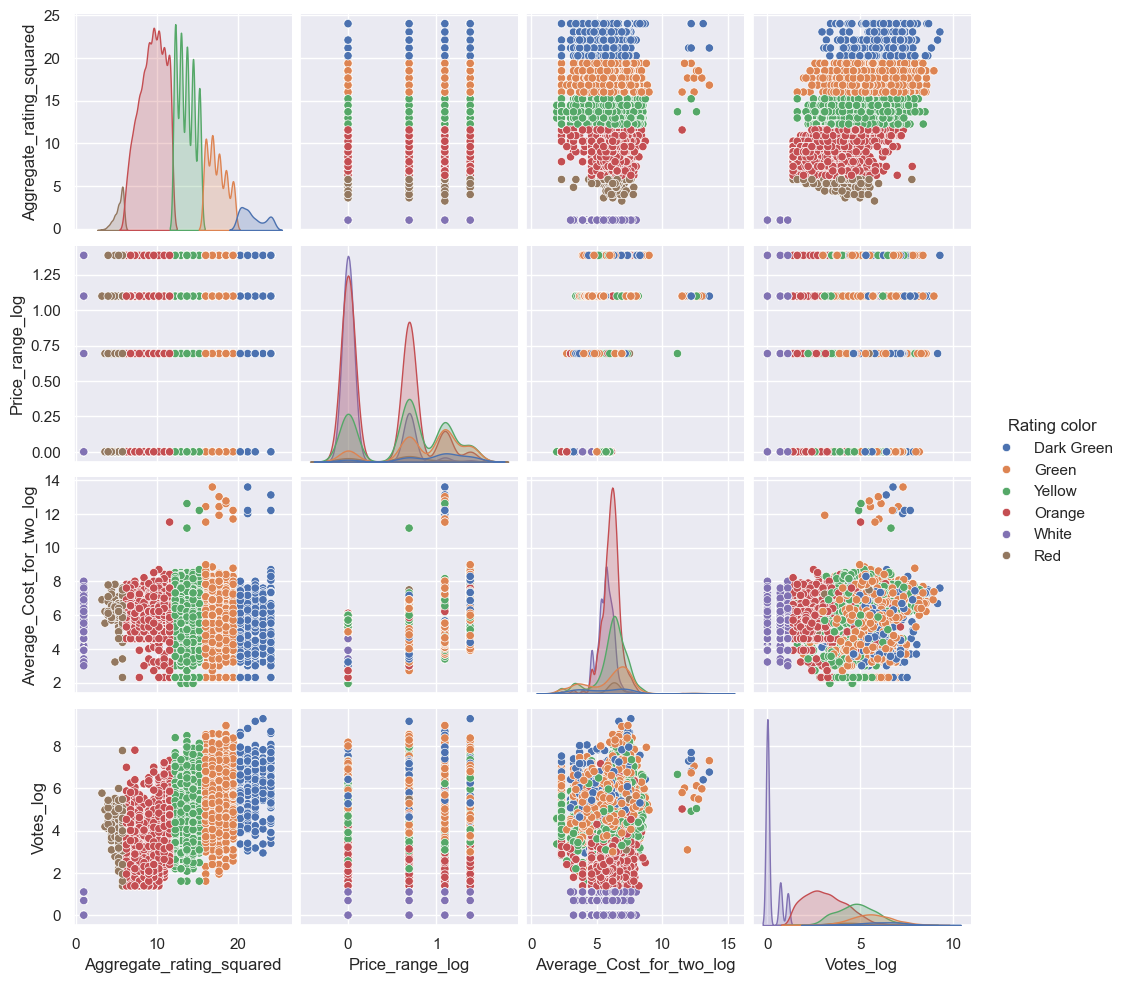

In [ ]:
plot = df[["Aggregate_rating_squared","Price_range_log","Average_Cost_for_two_log","Votes_log","Rating color"]]
sns.pairplot(plot,kind="scatter",hue="Rating color")

### **Countplot of Rating-color with hueness of Rating text**
***
understand Ratings among the restaurents

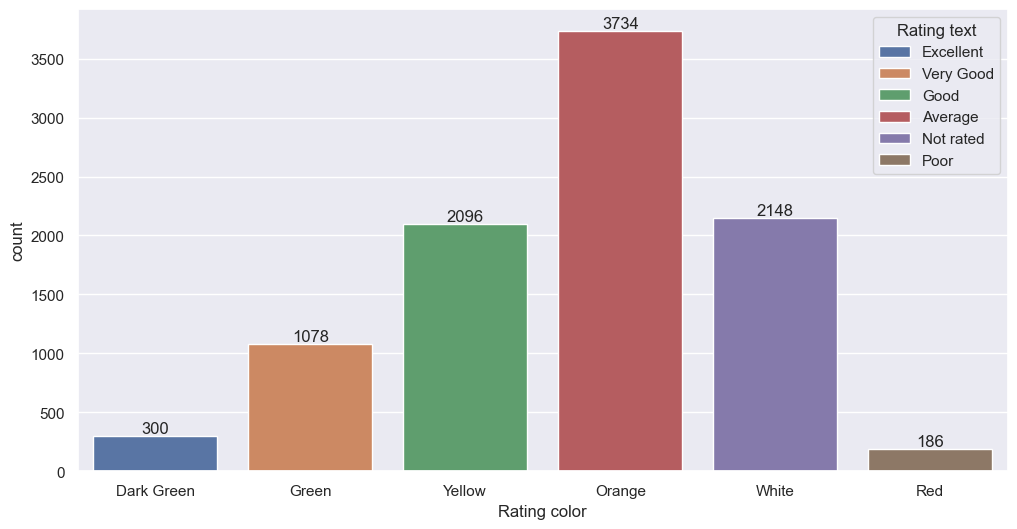

In [ ]:
plt.figure(figsize=(12,6))
ax = sns.countplot(data = df , x = "Rating color" , hue = "Rating text")
for i in ax.containers:
  ax.bar_label(i)

In [ ]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Aggregate_rating_squared', 'Price_range_log',
       'Average_Cost_for_two_log', 'Votes_log'],
      dtype='object')

### **Numerical features affecting the restaurent ratings**
***
* On seeing below heatmap we conclude that **Votes** column hightly correlated **0.87** with our target variable **Aggregate_ratings**
* **Country_code** and **Price_range** also having moderate coorelation with target varaiable of **0.38** and **0.49**

correlation values lies in -1 and 1
* The value nearest to -1 is **Negatively correlated with target variable**
* The value nearest to 1 is **Positively correlated with target variable**

<Axes: >

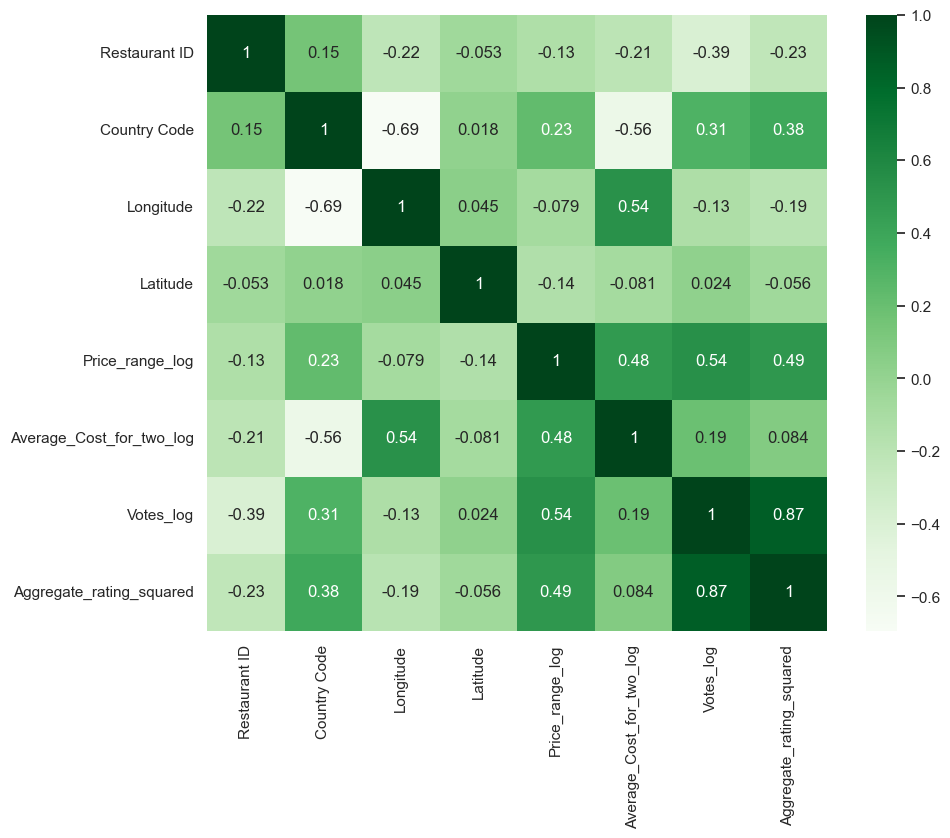

In [ ]:
corr = df[['Restaurant ID','Country Code','Longitude', 'Latitude','Price_range_log','Average_Cost_for_two_log', 'Votes_log','Aggregate_rating_squared']].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True,cmap="Greens")

### **Spearmaan correlation to find correlation between categorical and target variable with an evidence 'P' value**
***
* seeing the results we conclude that all category columns having **weak positive correlation** and **weak negative correlation** with target variable **Aggregate_ratings**.
* we need to check the evidence value P <= 0.05 we reject the null hypothesis then we can say that there is **significant correlation with target variable** with **Statistical evidance**.
* we need to check the evidence value P > 0.05 we accept the null hypothesis then we can say that there is no **significant correlation with target variable** with **Statistical evidance**.

In [ ]:
from scipy.stats import spearmanr

target = df["Aggregate_rating_squared"]

for col in df.select_dtypes("object").columns:
  print(col)
  print(spearmanr(df[col],target))
  print("-"*80) # switch to order table having Nan that means possibly due to constant values

Restaurant Name
SignificanceResult(statistic=0.02803616861691418, pvalue=0.006165616051678296)
--------------------------------------------------------------------------------
City
SignificanceResult(statistic=-0.15295297466718108, pvalue=4.851758954300037e-51)
--------------------------------------------------------------------------------
Address
SignificanceResult(statistic=-0.14603727317417906, pvalue=1.2225178544771273e-46)
--------------------------------------------------------------------------------
Locality
SignificanceResult(statistic=-0.19230219927477799, pvalue=3.69073994872102e-80)
--------------------------------------------------------------------------------
Locality Verbose
SignificanceResult(statistic=-0.19244954546506124, pvalue=2.7850155866787957e-80)
--------------------------------------------------------------------------------
Cuisines
SignificanceResult(statistic=-0.11659094175830204, pvalue=3.0840511071703633e-30)
---------------------------------------------

In [ ]:
X = df[['Longitude', 'Latitude','Price_range_log','Average_Cost_for_two_log', 'Votes_log','Restaurant Name','Cuisines','City','Currency','Has Table booking','Has Online delivery','Is delivering now','Rating text']]
Y = df["Aggregate_rating_squared"]

In [ ]:
for col in X.select_dtypes("object").columns:
  print(f"{col} has {X[col].nunique()} unique catergories in it")
  print("-"*80)

Restaurant Name has 7437 unique catergories in it
--------------------------------------------------------------------------------
Cuisines has 1825 unique catergories in it
--------------------------------------------------------------------------------
City has 140 unique catergories in it
--------------------------------------------------------------------------------
Currency has 12 unique catergories in it
--------------------------------------------------------------------------------
Has Table booking has 2 unique catergories in it
--------------------------------------------------------------------------------
Has Online delivery has 2 unique catergories in it
--------------------------------------------------------------------------------
Is delivering now has 2 unique catergories in it
--------------------------------------------------------------------------------
Rating text has 6 unique catergories in it
---------------------------------------------------------------------

### **Let's do some encoding techniques**

**Label_encoder**: each unique restaurent name assigned with unique integer value

In [ ]:
# In Restaurent name having 7437 unique categories

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

X["Restaurant Name"] = le.fit_transform(X["Restaurant Name"])

**Binary_encoder**: it is used for binary classes to impute one with **1** and another with **0**

In [ ]:
binary_columns = ['Has Table booking','Has Online delivery','Is delivering now']

for col in binary_columns:
  X[col] = X[col].map({"Yes":1,"No":0}) # map() is used to map 1 with each Yes class value and 0 with each No class

**One-Hot Encoding** : it creates unique column for each category and consider **1** if the value is present **0** for the value is not there

In [ ]:
one_hot_columns = ["City","Currency","Rating text"]
X = pd.get_dummies(X,columns=one_hot_columns)

for col in X.select_dtypes(bool).columns:
  X[col] = X[col].astype(int) # here we convert bool values into integer

**TargetEncoding**: replace each Cuisine with respective grouped mean , we can apply oneHotEncoding as well but , we have almost **9000** above values are unique classes we are getting , **so its computationally high when you go with oneHotEncoding**.

In [ ]:
target_mean = df.groupby("Cuisines")["Aggregate_rating_squared"].mean()
X["Cuisine_target_encoded"] = X["Cuisines"].map(target_mean)

In [ ]:
X.head()

Longitude   Latitude  Price_range_log  Average_Cost_for_two_log  \
0  121.027535  14.565443         1.098612                  7.003065   
1  121.014101  14.553708         1.098612                  7.090077   
2  121.056831  14.581404         1.386294                  8.294050   
3  121.056475  14.585318         1.386294                  7.313220   
4  121.057508  14.584450         1.386294                  7.313220   

   Votes_log  Restaurant Name                          Cuisines  \
0   5.749393             3742        French, Japanese, Desserts   
1   6.381816             3167                          Japanese   
2   5.598422             2892  Seafood, Asian, Filipino, Indian   
3   5.899897             4700                   Japanese, Sushi   
4   5.433722             5515                  Japanese, Korean   

   Has Table booking  Has Online delivery  Is delivering now  ...  \
0                  1                    0                  0  ...   
1                  1                    0                  0  ...   
2                  1                    0                  0  ...   
3                  0                    0                  0  ...   
4                  1                    0                  0  ...   

   Currency_Rand(R)  Currency_Sri Lankan Rupee(LKR)  \
0                 0                               0   
1                 0                               0   
2                 0                               0   
3                 0                               0   
4                 0                               0   

   Currency_Turkish Lira(TL)  Rating text_Average  Rating text_Excellent  \
0                          0                    0                      1   
1                          0                    0                      1   
2                          0                    0                      0   
3                          0                    0                      1   
4                          0                    0                      1   

   Rating text_Good  Rating text_Not rated  Rating text_Poor  \
0                 0                      0                 0   
1                 0                      0                 0   
2                 0                      0                 0   
3                 0                      0                 0   
4                 0                      0                 0   

   Rating text_Very Good  Cuisine_target_encoded  
0                      0               23.040000  
1                      0               13.675882  
2                      1               19.360000  
3                      0               16.543333  
4                      0               17.070000  

[5 rows x 169 columns]

In [ ]:
X.drop(columns=["Cuisines"],inplace=True)

In [ ]:
X.head()

Longitude   Latitude  Price_range_log  Average_Cost_for_two_log  \
0  121.027535  14.565443         1.098612                  7.003065   
1  121.014101  14.553708         1.098612                  7.090077   
2  121.056831  14.581404         1.386294                  8.294050   
3  121.056475  14.585318         1.386294                  7.313220   
4  121.057508  14.584450         1.386294                  7.313220   

   Votes_log  Restaurant Name  Has Table booking  Has Online delivery  \
0   5.749393             3742                  1                    0   
1   6.381816             3167                  1                    0   
2   5.598422             2892                  1                    0   
3   5.899897             4700                  0                    0   
4   5.433722             5515                  1                    0   

   Is delivering now  City_Abu Dhabi  ...  Currency_Rand(R)  \
0                  0               0  ...                 0   
1                  0               0  ...                 0   
2                  0               0  ...                 0   
3                  0               0  ...                 0   
4                  0               0  ...                 0   

   Currency_Sri Lankan Rupee(LKR)  Currency_Turkish Lira(TL)  \
0                               0                          0   
1                               0                          0   
2                               0                          0   
3                               0                          0   
4                               0                          0   

   Rating text_Average  Rating text_Excellent  Rating text_Good  \
0                    0                      1                 0   
1                    0                      1                 0   
2                    0                      0                 0   
3                    0                      1                 0   
4                    0                      1                 0   

   Rating text_Not rated  Rating text_Poor  Rating text_Very Good  \
0                      0                 0                      0   
1                      0                 0                      0   
2                      0                 0                      1   
3                      0                 0                      0   
4                      0                 0                      0   

   Cuisine_target_encoded  
0               23.040000  
1               13.675882  
2               19.360000  
3               16.543333  
4               17.070000  

[5 rows x 168 columns]

In [ ]:
X.shape

(9542, 168)

In [ ]:
Y.shape

(9542,)

In [ ]:
Y.head()

0    23.04
1    20.25
2    19.36
3    24.01
4    23.04
Name: Aggregate_rating_squared, dtype: float64

### **Now we are ready to build our Machine Learning model**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.preprocessing import LabelEncoder

X = df[['Longitude', 'Latitude','Price_range_log','Average_Cost_for_two_log', 'Votes_log','Restaurant Name','Cuisines','City','Currency','Has Table booking','Has Online delivery','Is delivering now','Rating text']]
Y = df["Aggregate_rating_squared"]

le = LabelEncoder()

X["Restaurant Name"] = le.fit_transform(X["Restaurant Name"])

binary_columns = ['Has Table booking','Has Online delivery','Is delivering now']

for col in binary_columns:
  X[col] = X[col].map({"Yes":1,"No":0}) # map() is used to map 1 with each Yes class value and 0 with each No class

one_hot_columns = ["City","Currency","Rating text"]
X = pd.get_dummies(X,columns=one_hot_columns)

for col in X.select_dtypes(bool).columns:
  X[col] = X[col].astype(int) # here we convert bool values into integer

target_mean = df.groupby("Cuisines")["Aggregate_rating_squared"].mean()
X["Cuisine_target_encoded"] = X["Cuisines"].map(target_mean)

X.drop(columns=["Cuisines"],inplace=True)

ss = StandardScaler()
Scaled_X = ss.fit_transform(X) # before applying splitting we have to make the all features on same to avoid dominating of certain features in training.

print(Scaled_X.shape)
print(Y.shape)

(9542, 168)
(9542,)


In [ ]:
X_train , X_test , Y_train , Y_test = train_test_split(Scaled_X , Y , test_size = 0.2 , random_state = 1)

In [ ]:
print(X_train.shape , Y_train.shape)

(7633, 168) (7633,)


### **Decision Tree Regressor**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()

dtr.fit(X_train , Y_train)

DecisionTreeRegressor()

In [ ]:
Y_pred = dtr.predict(X_test)

In [ ]:
print("R2_score: ",r2_score(Y_test,Y_pred))
print("MSE : " , mean_squared_error(Y_test,Y_pred))

R2_score:  0.9374069420703599
MSE :  2.013800314300681


In [ ]:
res = np.sqrt(Y_pred)
print(np.round(res,2))

[2.9 3.9 4.2 ... 3.  1.  1. ]


In [ ]:
feature_importance = dtr.feature_importances_

importance_df = pd.DataFrame({"Feature":X.columns , "Importance":feature_importance})

importance_df = importance_df.sort_values(by="Importance" , ascending = False)

print(importance_df[:10]) # Top 10 important features in DecisionTreeRegressor

                      Feature  Importance
4                   Votes_log    0.654869
161       Rating text_Average    0.181395
163          Rating text_Good    0.059135
165          Rating text_Poor    0.057769
166     Rating text_Very Good    0.014363
167    Cuisine_target_encoded    0.009650
0                   Longitude    0.006377
5             Restaurant Name    0.005620
1                    Latitude    0.005413
3    Average_Cost_for_two_log    0.002623


### **Top-10 important features used in DecisionTreeRegressor**

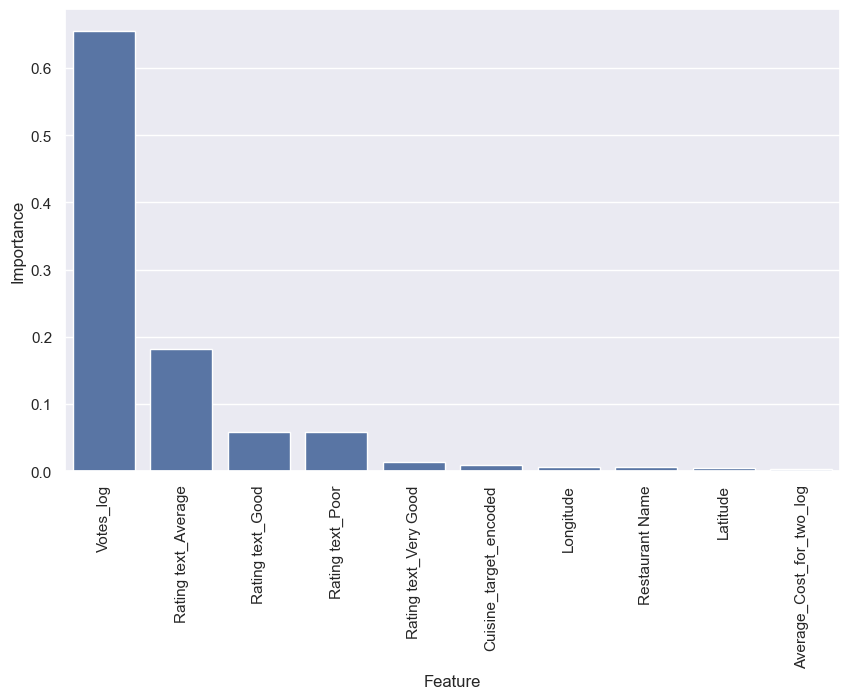

In [ ]:
importance_df = importance_df.sort_values(by="Importance" , ascending = False)[:10]
plt.figure(figsize=(10,6))
ax = sns.barplot(importance_df , x = "Feature" , y = "Importance" )
plt.xticks(rotation=90)
plt.show()

### **Random Forest Regressor**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(random_state = 1)

rfr.fit(X_train , Y_train)

Y_pred = rfr.predict(X_test)

print("R2_score: ",r2_score(Y_test,Y_pred))
print("MSE : " , mean_squared_error(Y_test,Y_pred))

R2_score:  0.9659733126097186
MSE :  1.0947372764274488


In [ ]:
res = np.sqrt(Y_pred)
print(np.round(res,2))

[2.97 3.77 4.2  ... 2.91 1.   1.  ]


In [ ]:
feature_importance = rfr.feature_importances_

importance_df = pd.DataFrame({"Feature":X.columns , "Importance":feature_importance})

importance_df = importance_df.sort_values(by="Importance" , ascending = False)

print(importance_df[:10]) # Top 10 important features in RandomForestRegressor

                    Feature  Importance
164   Rating text_Not rated    0.343189
4                 Votes_log    0.312532
161     Rating text_Average    0.181467
163        Rating text_Good    0.057980
165        Rating text_Poor    0.056944
166   Rating text_Very Good    0.014302
167  Cuisine_target_encoded    0.009293
1                  Latitude    0.005938
5           Restaurant Name    0.005393
0                 Longitude    0.005320


### **Top-10 important features used in RandomForestRegressor**

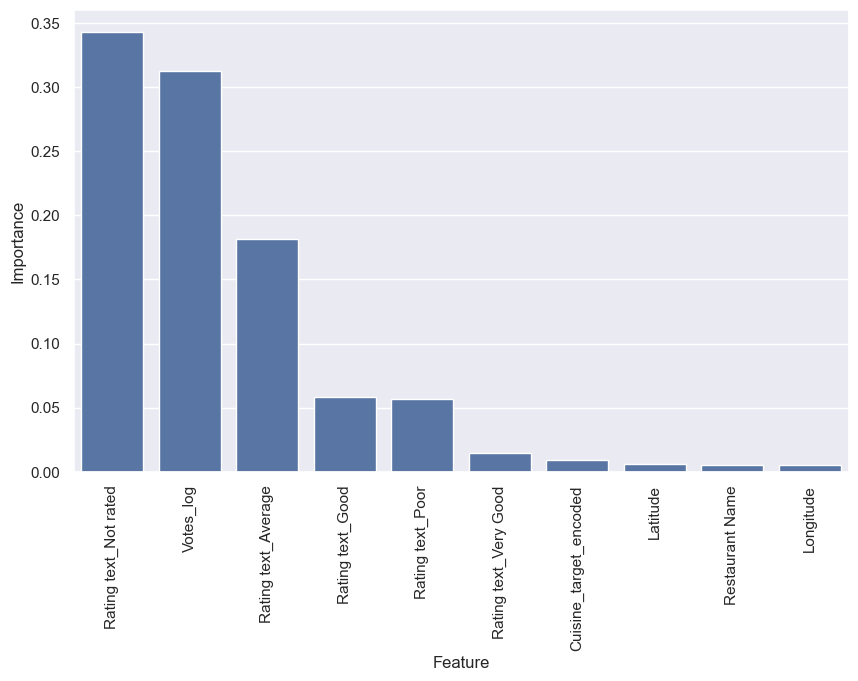

In [ ]:
importance_df = importance_df.sort_values(by="Importance" , ascending = False)[:10]
plt.figure(figsize=(10,6))
sns.barplot(importance_df , x = "Feature" , y = "Importance" )
plt.xticks(rotation=90)
plt.show()

### **Testing new data to predict ratings**

In [ ]:
sample = {
    "Longitude":121.027535,
    "Latitude":14.565443 ,
    "Price_range_log":np.log(4) ,
    "Average_Cost_for_two_log" : np.log(50000) ,
    "Votes_log" : np.log(250) ,
    "Restaurant Name" : "Le Petit Souffle" ,
    "Cuisines" : "French, Japanese, Desserts",
    "City" : "Makati City" ,
    "Currency" : "Botswana Pula(P)" ,
    "Has Table booking" : "Yes" ,
    "Has Online delivery" : "No" ,
    "Is delivering now" : "No" ,
    "Rating text" : "Very Good"
}

sample_df = pd.DataFrame([sample])

sample_df["Restaurant Name"] = le.transform(sample_df["Restaurant Name"])

binary_columns = ['Has Table booking','Has Online delivery','Is delivering now']

for col in binary_columns:
  sample_df[col] = sample_df[col].map({"Yes":1,"No":0}) # map() is used to map 1 with each Yes class value and 0 with each No class

one_hot_columns = ["City","Currency","Rating text"]
sample_df = pd.get_dummies(sample_df,columns=one_hot_columns,dtype=int)

# to handle categorical classes of encoding which is not there in our training
for col in X.columns:
  if col not in sample_df.columns:
    sample_df[col] = 0

# Target encoding
target_mean = df.groupby("Cuisines")["Aggregate_rating_squared"].mean()
sample_df["Cuisine_target_encoded"] = sample_df["Cuisines"].map(target_mean)

sample_df.drop(columns=["Cuisines"],inplace=True)

sample_df = sample_df[X.columns] # arranging columns based on training columns

scaler = StandardScaler()
scaler.fit(X) # here we again fit the scaling to training because , in previous i use fit_transform at a time so that's why my new df is not transformd properly

new_scaled_sample_df = scaler.transform(sample_df) # transform the sample_df based on above fitted training scaler

predict = rfr.predict(new_scaled_sample_df) # we are predicting sample by using RandomForestRegressor model

print("New sample rating prediction: ", *np.round(np.sqrt(predict),2))

New sample rating prediction:  4.23


In [ ]:
df.to_csv("Dataset.csv",index=False)

In [ ]:
restaurant_name = df["Restaurant Name"].unique()
print("-"*80)
Cuisines = df["Cuisines"].unique()
print("-"*80)
City = df["City"].unique()
print("-"*80)
Currency = df["Currency"].unique()
print("-"*80)
Has_table = df["Has Table booking"].unique()
print("-"*80)
Has_online = df["Has Online delivery"].unique()
print("-"*80)
Is_delivery = df["Is delivering now"].unique()
print("-"*80)
Rating_text = df["Rating text"].unique()

--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------


In [ ]:
import pickle
with open("Label_encoder.pkl","wb") as file:
    Label_encoder = pickle.dump(le,file)
with open("Training_data.pkl","wb") as file:
    X = pickle.dump(X,file)
with open("restaurant_Name.pkl","wb") as file:
    restaurant_name = pickle.dump(restaurant_name,file)
with open("Cuisines.pkl","wb") as file:
    Cuisines = pickle.dump(Cuisines,file)
with open("City.pkl","wb") as file:
    City = pickle.dump(City,file)
with open("Currency.pkl","wb") as file:
    Currency = pickle.dump(Currency,file)
with open("Has_table.pkl","wb") as file:
    Has_table = pickle.dump(Has_table,file)
with open("Has_online.pkl","wb") as file:
    Has_online = pickle.dump(Has_online,file)
with open("Is_delivery.pkl","wb") as file:
    Is_delivery = pickle.dump(Is_delivery,file)
with open("Rating_text.pkl","wb") as file:
    Rating_text = pickle.dump(Rating_text,file)
with open("Restaurant_scaling.pkl","wb") as file:
    scaler = pickle.dump(scaler,file)
with open("Restaurant_model.pkl","wb") as file:
    rfr = pickle.dump(rfr,file)

### **Converting ipynb file to html**

In [ ]:
# !jupyter nbconvert --to html r"D:\internships\ML intern\cognifyz_internship_tasks.ipynb"

## **Task - 2**:  Restaurant Recommendation

### **Objective**:  Create a restaurant recommendation system based on user preferences.

In [ ]:
rec_df = df.copy()

res_df = df.copy()

rec_df.head()

Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM Megamall, Ortigas, Mandaluyong City   
4      SM Megamall, Ortigas, Mandaluyong City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   
2  Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831  14.581404   
3  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475  14.585318   
4  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508  14.584450   

                           Cuisines  ...  Switch to order menu Price range  \
0        French, Japanese, Desserts  ...                    No           3   
1                          Japanese  ...                    No           3   
2  Seafood, Asian, Filipino, Indian  ...                    No           4   
3                   Japanese, Sushi  ...                    No           4   
4                  Japanese, Korean  ...                    No           4   

  Aggregate rating Rating color Rating text Votes  Aggregate_rating_squared  \
0              4.8   Dark Green   Excellent   314                     23.04   
1              4.5   Dark Green   Excellent   591                     20.25   
2              4.4        Green   Very Good   270                     19.36   
3              4.9   Dark Green   Excellent   365                     24.01   
4              4.8   Dark Green   Excellent   229                     23.04   

   Price_range_log Average_Cost_for_two_log Votes_log  
0         1.098612                 7.003065  5.749393  
1         1.098612                 7.090077  6.381816  
2         1.386294                 8.294050  5.598422  
3         1.386294                 7.313220  5.899897  
4         1.386294                 7.313220  5.433722  

[5 rows x 25 columns]

In [ ]:
rec_df.isna().sum()

Restaurant ID               0
Restaurant Name             0
Country Code                0
City                        0
Address                     0
Locality                    0
Locality Verbose            0
Longitude                   0
Latitude                    0
Cuisines                    0
Average Cost for two        0
Currency                    0
Has Table booking           0
Has Online delivery         0
Is delivering now           0
Switch to order menu        0
Price range                 0
Aggregate rating            0
Rating color                0
Rating text                 0
Votes                       0
Aggregate_rating_squared    0
Price_range_log             0
Average_Cost_for_two_log    0
Votes_log                   0
dtype: int64

In [ ]:
rec_df.shape

(9542, 25)

In [ ]:
rec_df["City"].nunique()

140

In [ ]:
rec_df["Price range"].unique()

array([3, 4, 2, 1], dtype=int64)

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer


mlb = MultiLabelBinarizer()

MLB_enc = mlb.fit_transform(rec_df["Cuisines"].str.split(",")) # MultiLableBinarizer expects list of list values to divide into binary classes otherwise it will takes single character string as column name

enc_df  = pd.DataFrame(MLB_enc,columns=list(mlb.classes_))
enc_df

Afghani   African   American   Andhra   Arabian   Argentine   Armenian  \
0            0         0          0        0         0           0          0   
1            0         0          0        0         0           0          0   
2            0         0          0        0         0           0          0   
3            0         0          0        0         0           0          0   
4            0         0          0        0         0           0          0   
...        ...       ...        ...      ...       ...         ...        ...   
9537         0         0          0        0         0           0          0   
9538         0         0          0        0         0           0          0   
9539         0         0          0        0         0           0          0   
9540         0         0          0        0         0           0          0   
9541         0         0          0        0         0           0          0   

       Asian   Assamese   Australian  ...  Tapas  Tea  Tex-Mex  Thai  Tibetan  \
0          0          0            0  ...      0    0        0     0        0   
1          0          0            0  ...      0    0        0     0        0   
2          1          0            0  ...      0    0        0     0        0   
3          0          0            0  ...      0    0        0     0        0   
4          0          0            0  ...      0    0        0     0        0   
...      ...        ...          ...  ...    ...  ...      ...   ...      ...   
9537       0          0            0  ...      0    0        0     0        0   
9538       0          0            0  ...      0    0        0     0        0   
9539       0          0            0  ...      0    0        0     0        0   
9540       0          0            0  ...      0    0        0     0        0   
9541       0          0            0  ...      0    0        0     0        0   

      Turkish  Turkish Pizza  Vietnamese  Western  World Cuisine  
0           0              0           0        0              0  
1           0              0           0        0              0  
2           0              0           0        0              0  
3           0              0           0        0              0  
4           0              0           0        0              0  
...       ...            ...         ...      ...            ...  
9537        1              0           0        0              0  
9538        0              0           0        0              1  
9539        0              0           0        0              0  
9540        0              0           0        0              0  
9541        0              0           0        0              0  

[9542 rows x 249 columns]

In [ ]:
rec_df.drop(columns=["Cuisines"],inplace=True)

# mapping numeric levels of price range with string values
rec_df["Price range"] = rec_df["Price range"].map({1:"Low",2:"Medium",3:"High",4:"Premium"}) # map() is used to map 1 with each Yes class value and 0 with each No class

In [ ]:
# mapping numeric levels of price range with string values
res_df["Price range"] = res_df["Price range"].map({1:"Low",2:"Medium",3:"High",4:"Premium"}) # map() is used to map 1 with each Yes class value and 0 with each No class

In [ ]:
city_ohe = pd.get_dummies(rec_df,columns=["City"],dtype=int)
price_ohe = pd.get_dummies(rec_df,columns=["Price range"],dtype=int)

In [ ]:
city_ohe = city_ohe.loc[:,city_ohe.columns.str.startswith("City")]
price_ohe = price_ohe.loc[:,price_ohe.columns.str.startswith("Price range")]

In [ ]:
city_ohe

City_Abu Dhabi  City_Agra  City_Ahmedabad  City_Albany  City_Allahabad  \
0                  0          0               0            0               0   
1                  0          0               0            0               0   
2                  0          0               0            0               0   
3                  0          0               0            0               0   
4                  0          0               0            0               0   
...              ...        ...             ...          ...             ...   
9546               0          0               0            0               0   
9547               0          0               0            0               0   
9548               0          0               0            0               0   
9549               0          0               0            0               0   
9550               0          0               0            0               0   

      City_Amritsar  City_Ankara  City_Armidale  City_Athens  City_Auckland  \
0                 0            0              0            0              0   
1                 0            0              0            0              0   
2                 0            0              0            0              0   
3                 0            0              0            0              0   
4                 0            0              0            0              0   
...             ...          ...            ...          ...            ...   
9546              0            0              0            0              0   
9547              0            0              0            0              0   
9548              0            0              0            0              0   
9549              0            0              0            0              0   
9550              0            0              0            0              0   

      ...  City_Vernonia  City_Victor Harbor  City_Vineland Station  \
0     ...              0                   0                      0   
1     ...              0                   0                      0   
2     ...              0                   0                      0   
3     ...              0                   0                      0   
4     ...              0                   0                      0   
...   ...            ...                 ...                    ...   
9546  ...              0                   0                      0   
9547  ...              0                   0                      0   
9548  ...              0                   0                      0   
9549  ...              0                   0                      0   
9550  ...              0                   0                      0   

      City_Vizag  City_Waterloo  City_Weirton  City_Wellington City  \
0              0              0             0                     0   
1              0              0             0                     0   
2              0              0             0                     0   
3              0              0             0                     0   
4              0              0             0                     0   
...          ...            ...           ...                   ...   
9546           0              0             0                     0   
9547           0              0             0                     0   
9548           0              0             0                     0   
9549           0              0             0                     0   
9550           0              0             0                     0   

      City_Winchester Bay  City_Yorkton  City_��stanbul  
0                       0             0               0  
1                       0             0               0  
2                       0             0               0  
3                       0             0               0  
4                       0             0               0  
...                   ...           ...   

In [ ]:
price_ohe

Price range_High  Price range_Low  Price range_Medium  \
0                    1                0                   0   
1                    1                0                   0   
2                    0                0                   0   
3                    0                0                   0   
4                    0                0                   0   
...                ...              ...                 ...   
9546                 1                0                   0   
9547                 1                0                   0   
9548                 0                0                   0   
9549                 0                0                   0   
9550                 0                0                   1   

      Price range_Premium  
0                       0  
1                       0  
2                       1  
3                       1  
4                       1  
...                   ...  
9546                    0  
9547                    0  
9548                    1  
9549                    1  
9550                    0  

[9542 rows x 4 columns]

In [ ]:
city_ohe = city_ohe.reset_index(drop=True)
price_ohe = price_ohe.reset_index(drop=True) # to drop the index completely , to avoid index ambiguity when concatenate two or more dataframes
con_df = pd.concat([enc_df,city_ohe,price_ohe],axis=1)

### **Complete encoded concatenate dataframe of Price_range , Cuisines , location**

In [ ]:
con_df

Afghani   African   American   Andhra   Arabian   Argentine   Armenian  \
0            0         0          0        0         0           0          0   
1            0         0          0        0         0           0          0   
2            0         0          0        0         0           0          0   
3            0         0          0        0         0           0          0   
4            0         0          0        0         0           0          0   
...        ...       ...        ...      ...       ...         ...        ...   
9537         0         0          0        0         0           0          0   
9538         0         0          0        0         0           0          0   
9539         0         0          0        0         0           0          0   
9540         0         0          0        0         0           0          0   
9541         0         0          0        0         0           0          0   

       Asian   Assamese   Australian  ...  City_Waterloo  City_Weirton  \
0          0          0            0  ...              0             0   
1          0          0            0  ...              0             0   
2          1          0            0  ...              0             0   
3          0          0            0  ...              0             0   
4          0          0            0  ...              0             0   
...      ...        ...          ...  ...            ...           ...   
9537       0          0            0  ...              0             0   
9538       0          0            0  ...              0             0   
9539       0          0            0  ...              0             0   
9540       0          0            0  ...              0             0   
9541       0          0            0  ...              0             0   

      City_Wellington City  City_Winchester Bay  City_Yorkton  City_��stanbul  \
0                        0                    0             0               0   
1                        0                    0             0               0   
2                        0                    0             0               0   
3                        0                    0             0               0   
4                        0                    0             0               0   
...                    ...                  ...           ...             ...   
9537                     0                    0             0               1   
9538                     0                    0             0               1   
9539                     0                    0             0               1   
9540                     0                    0             0               1   
9541                     0                    0             0               1   

      Price range_High  Price range_Low  Price range_Medium  \
0                    1                0                   0   
1                    1                0                   0   
2                    0                0                   0   
3                    0                0                   0   
4                    0                0                   0   
...                ...              ...                 ...   
9537                 1                0                   0   
9538                 1                0                   0   
9539                 0                0                   0   
9540                 0                0                   0   
9541                 0                0                   1   

      Price range_Premium  
0                       0  
1                       0  
2                       1  
3                       1  
4                       1  
...                   ...  
9537                    0  
9538                    0  
9539                    1  
9540                    1  
9541                    0  

[9542 rows x 393 columns]

### **Testing sample user preference**

In [ ]:
rec_df["City"].unique()

array(['Makati City', 'Mandaluyong City', 'Pasay City', 'Pasig City',
       'Quezon City', 'San Juan City', 'Santa Rosa', 'Tagaytay City',
       'Taguig City', 'Bras�_lia', 'Rio de Janeiro', 'S��o Paulo',
       'Albany', 'Armidale', 'Athens', 'Augusta', 'Balingup',
       'Beechworth', 'Boise', 'Cedar Rapids/Iowa City', 'Chatham-Kent',
       'Clatskanie', 'Cochrane', 'Columbus', 'Consort', 'Dalton',
       'Davenport', 'Des Moines', 'Dicky Beach', 'Dubuque',
       'East Ballina', 'Fernley', 'Flaxton', 'Forrest', 'Gainesville',
       'Hepburn Springs', 'Huskisson', 'Inverloch', 'Lakes Entrance',
       'Lakeview', 'Lincoln', 'Lorn', 'Macedon', 'Macon', 'Mayfield',
       'Mc Millan', 'Middleton Beach', 'Monroe', 'Montville',
       'Ojo Caliente', 'Orlando', 'Palm Cove', 'Paynesville', 'Penola',
       'Pensacola', 'Phillip Island', 'Pocatello', 'Potrero', 'Princeton',
       'Rest of Hawaii', 'Savannah', 'Singapore', 'Sioux City',
       'Tampa Bay', 'Tanunda', 'Trentham East', '

In [ ]:
res_df["Cuisines"].unique()

array(['French, Japanese, Desserts', 'Japanese',
       'Seafood, Asian, Filipino, Indian', ..., 'Burger, Izgara',
       'World Cuisine, Patisserie, Cafe', 'Italian, World Cuisine'],
      dtype=object)

### **Cosine similarity**: Cosine similarity measures the cosine of the angle between two vectors in a multi-dimensional space. it is calculated as the dot product of the vectors divided by the product of their magnitudes.The value of cosine similarity ranges from **-1** to **1**:

* **High score (Close to 1)**: it indicates that the two vectors are very similar.In context of recommendation system , this means that the user's preferences are closely aligned with characteristics of the restaurant.

* **Low score (Close to -1)**: it indicates that the two vectors are opposed.In context of recommendation system , this means that the user's preferences are very different from the characteristics of the restaurant.

* **Scores Around 0**: it indicates that there is no significant similarity between them , this means that the uses's preferences and restaurant's characteristics are not strongly related

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

user_preference = {
    "Cuisines":"Cafe",
    "City" : "Agra",
    "Price range" : "Low"
}

user_df = pd.DataFrame([user_preference])

MLB_enc = mlb.transform(user_df["Cuisines"].str.split(",")) # MultiLableBinarizer expects list of list values to divide into binary classes otherwise it will takes single character string as column name

enc_df  = pd.DataFrame(MLB_enc,columns=list(mlb.classes_))



user_df = pd.concat([user_df,enc_df],axis=1)

user_df.drop(columns=["Cuisines"],inplace=True)

cat_columns = ["Price range","City"]

for i in cat_columns:
    user_df = pd.get_dummies(user_df,columns=[i])

for col in con_df.columns:
    if col not in user_df.columns:
        user_df[col] = 0

user_df[con_df.columns]

similarity_scores = cosine_similarity(user_df , con_df) # comparing user_preference df and concatenation_df of encoded_df to get the cosine similarty scores to recommand top 10 restaurants



Top_n_indices = similarity_scores[0].argsort()[-10:][::-1] # retutn indices that would sort the similarity scores array
# [-10:] to get last 10 because here we are sorted in asceding order to get top 10 we need to select last one , [::-1] to reverse the list from 1 to 10


recommended_restaurents = res_df.iloc[Top_n_indices] # here we are filter out the rows based on given Top_n_indeces

recommended_restaurents["Cosine_similarity_scores"] = sorted(similarity_scores[0],reverse=True)[:10]
recommended_restaurents[["Restaurant Name","Cuisines","City","Price range","Cosine_similarity_scores"]]

Restaurant Name  \
637            Sheroes Hangout   
639             Chapter 1 Cafe   
9550  Walter's Coffee Roastery   
1586           Cafe Coffee Day   
1552              Costa Coffee   
1556     Barista Creme Lavazza   
7875           Cafe Coffee Day   
7874                Cafe Amigo   
1561                 Starbucks   
1564                   Barista   

                                               Cuisines       City  \
637                         Cafe, North Indian, Chinese       Agra   
639   Cafe, Italian, Mexican, North Indian, Continental       Agra   
9550                                               Cafe  ��stanbul   
1586                                               Cafe    Gurgaon   
1552                                               Cafe    Gurgaon   
1556                                               Cafe    Gurgaon   
7875                                               Cafe  New Delhi   
7874                                               Cafe  New Delhi   
1561                                               Cafe    Gurgaon   
1564                                               Cafe    Gurgaon   

     Price range  Cosine_similarity_scores  
637          Low                  0.516398  
639          Low                  0.436436  
9550      Medium                  0.333333  
1586         Low                  0.333333  
1552      Medium                  0.333333  
1556      Medium                  0.333333  
7875         Low                  0.333333  
7874         Low                  0.333333  
1561      Medium                  0.333333  
1564      Medium                  0.333333

## **Task - 3**:  Location_based_analysis

### **Objective**:  Perform a geographical analysis of the restaurants in the dataset

In [ ]:
geo_df = df.copy()
geo_df.head()

Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM Megamall, Ortigas, Mandaluyong City   
4      SM Megamall, Ortigas, Mandaluyong City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   
2  Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831  14.581404   
3  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475  14.585318   
4  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508  14.584450   

                           Cuisines  ...  Switch to order menu Price range  \
0        French, Japanese, Desserts  ...                    No           3   
1                          Japanese  ...                    No           3   
2  Seafood, Asian, Filipino, Indian  ...                    No           4   
3                   Japanese, Sushi  ...                    No           4   
4                  Japanese, Korean  ...                    No           4   

  Aggregate rating Rating color Rating text Votes  Aggregate_rating_squared  \
0              4.8   Dark Green   Excellent   314                     23.04   
1              4.5   Dark Green   Excellent   591                     20.25   
2              4.4        Green   Very Good   270                     19.36   
3              4.9   Dark Green   Excellent   365                     24.01   
4              4.8   Dark Green   Excellent   229                     23.04   

   Price_range_log Average_Cost_for_two_log Votes_log  
0         1.098612                 7.003065  5.749393  
1         1.098612                 7.090077  6.381816  
2         1.386294                 8.294050  5.598422  
3         1.386294                 7.313220  5.899897  
4         1.386294                 7.313220  5.433722  

[5 rows x 25 columns]

In [ ]:
geo_df["Price range"] = rec_df["Price range"]

#### **Explore the latitude and longitude coordinates of the restaurants and visualize their distribution on a map.**

In [ ]:
# !pip install --upgrade nbformat

In [ ]:
import plotly.express as px

fig = px.scatter_mapbox(
    geo_df,
    lat = "Latitude",
    lon = "Longitude",
    hover_name = "Restaurant Name",
    hover_data = ["Cuisines","Aggregate rating","City"],
    color = "City",
    zoom = 0.5,
    height = 600
)

fig.update_layout(mapbox_style = "carto-positron")

fig.show()

In [ ]:
import plotly.io as pio

pio.write_html(fig,"map.html")

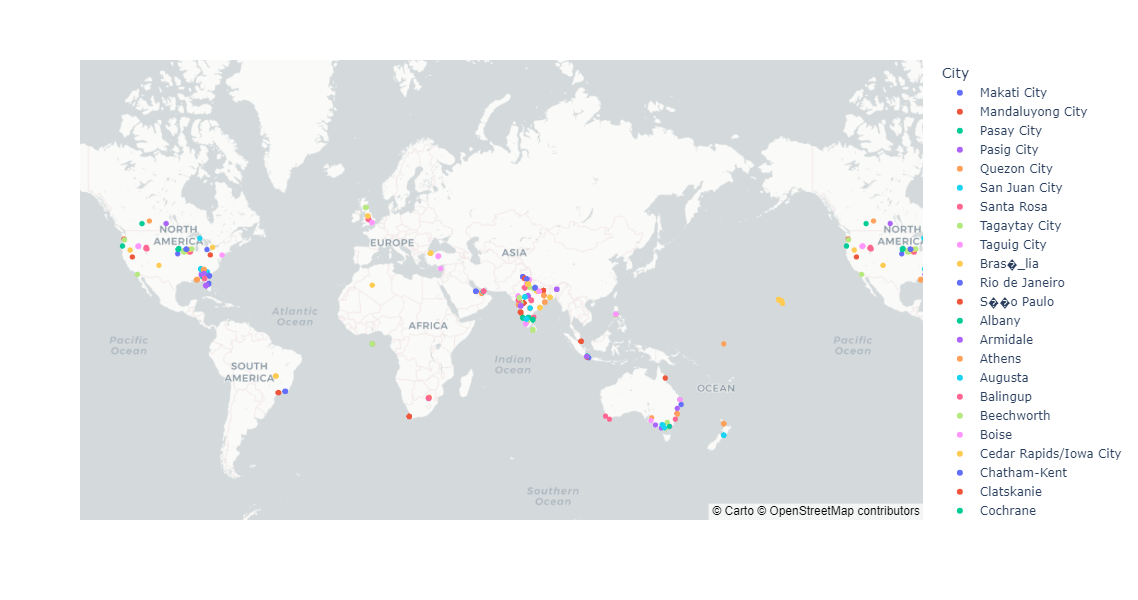

In [ ]:
from PIL import Image
from IPython.display import display

image = Image.open(r"D:\internships\ML intern\newplot.webp")
display(image)

#### **Group the restaurants by city or locality and analyze the concentration of restaurants in different areas**

In [ ]:
city_by_restaurant_name = geo_df.groupby("City")["Restaurant Name"].count().sort_values(ascending=False).reset_index()

city_by_restaurant_name

City  Restaurant Name
0    New Delhi             5473
1      Gurgaon             1118
2        Noida             1080
3    Faridabad              251
4    Ghaziabad               25
..         ...              ...
135   Randburg                1
136    Macedon                1
137       Lorn                1
138    Lincoln                1
139    Forrest                1

[140 rows x 2 columns]

#### **Calculate statistics such as the average ratings, cuisines, or price ranges by city or locality.**

In [ ]:
city_Average_rating = geo_df.groupby("City")["Aggregate rating"].mean().sort_values(ascending=False).reset_index()

city_cuisine_count = geo_df.groupby("City")["Cuisines"].count().sort_values(ascending=False).reset_index()

In [ ]:
city_Average_rating

City  Aggregate rating
0          Inner City          4.900000
1         Quezon City          4.800000
2         Makati City          4.650000
3          Pasig City          4.633333
4    Mandaluyong City          4.625000
..                ...               ...
135         New Delhi          2.438845
136         Montville          2.400000
137         Mc Millan          2.400000
138             Noida          2.036204
139         Faridabad          1.866932

[140 rows x 2 columns]

#### **Top-10 Cities by Aggregate ratings with Price range**

<Axes: xlabel='City', ylabel='Aggregate rating'>

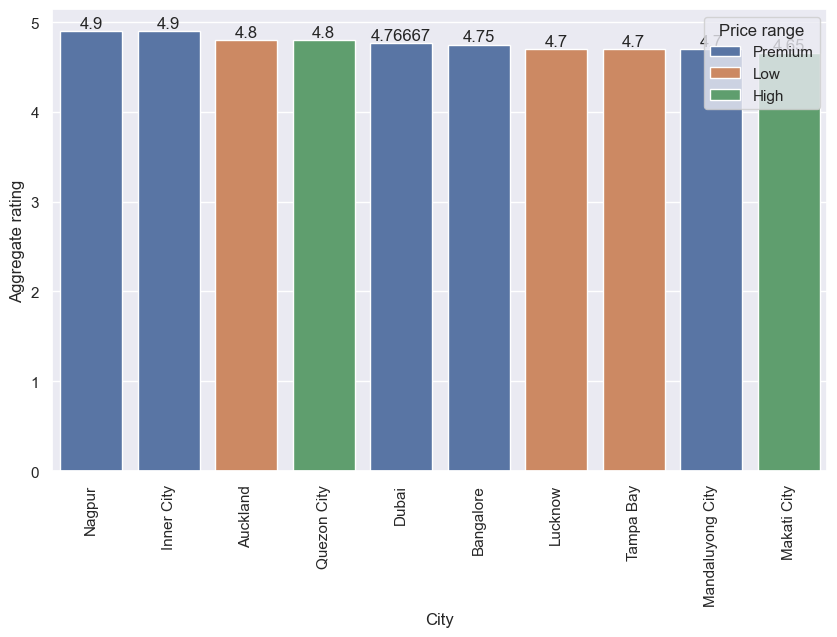

In [ ]:
city_Average_rating_10 = geo_df.groupby(["City","Price range"])["Aggregate rating"].mean().sort_values(ascending=False)[:10].reset_index()

plt.figure(figsize=(10,6))
ax = sns.barplot(data=city_Average_rating_10 , x = "City" , y = "Aggregate rating" , hue = "Price range")

for i in ax.containers:
    ax.bar_label(i)

plt.xticks(rotation=90)
ax

In [ ]:
city_cuisine_count

City  Cuisines
0    New Delhi      5473
1      Gurgaon      1118
2        Noida      1080
3    Faridabad       251
4    Ghaziabad        25
..         ...       ...
135   Randburg         1
136    Macedon         1
137       Lorn         1
138    Lincoln         1
139    Forrest         1

[140 rows x 2 columns]

#### **Price range count by city**

In [ ]:
price_range = geo_df.groupby(["City"])["Price range"].count().sort_values(ascending=False).reset_index() # unstack is used to reshape a dataframe by pivoting a row index into the column index

price_range

City  Price range
0    New Delhi         5473
1      Gurgaon         1118
2        Noida         1080
3    Faridabad          251
4    Ghaziabad           25
..         ...          ...
135   Randburg            1
136    Macedon            1
137       Lorn            1
138    Lincoln            1
139    Forrest            1

[140 rows x 2 columns]

#### **Price distribution countplot**

> To understand how the distribution of price range vary based on rating text

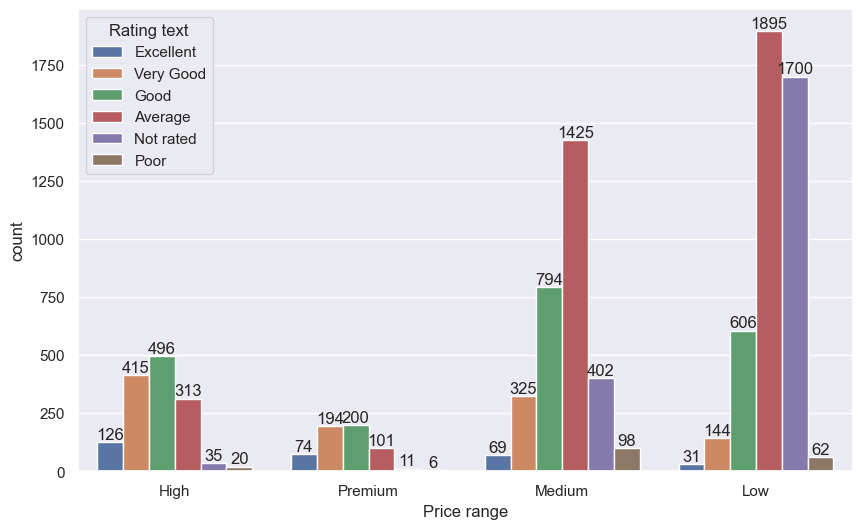

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.countplot(data=geo_df , x = "Price range" , hue = "Rating text")

for i in ax.containers:
    ax.bar_label(i)

#### **Rating text distribution countplot**

> To understand how the distribution of rating text vary based on price range

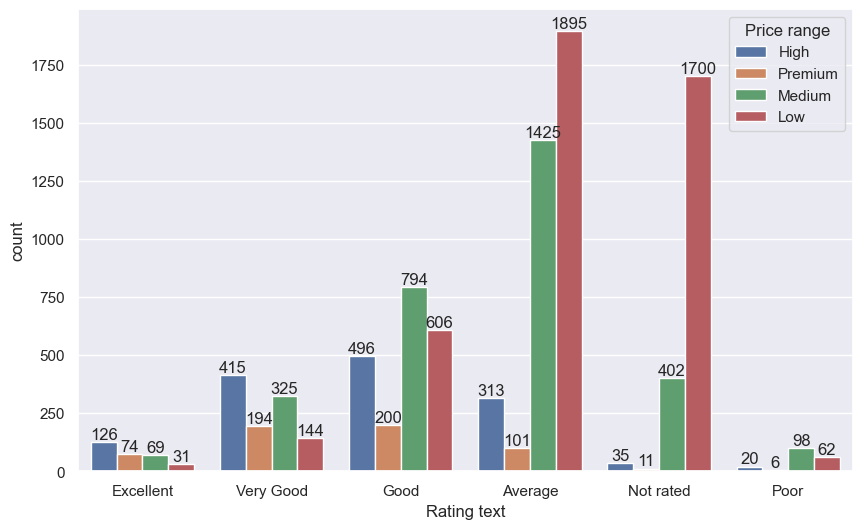

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.countplot(data=geo_df , x = "Rating text" , hue = "Price range")

for i in ax.containers:
    ax.bar_label(i)

#### **Top-10 Cities by customer reviews with rating text distribution**

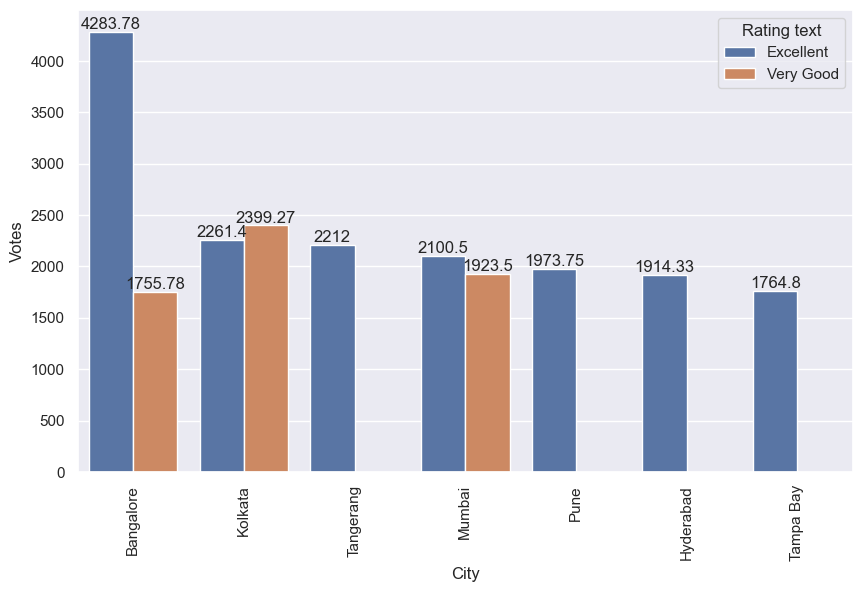

In [ ]:
plt.figure(figsize=(10,6))
Grouped_locations = geo_df.groupby(["City","Rating text"])["Votes"].mean().sort_values(ascending=False)[:10].reset_index()
ax = sns.barplot(Grouped_locations,x = "City" , y = "Votes" , hue = "Rating text")
for i in ax.containers:
    ax.bar_label(i)
plt.xticks(rotation=90)
plt.show()

In [ ]:
geo_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Aggregate_rating_squared', 'Price_range_log',
       'Average_Cost_for_two_log', 'Votes_log'],
      dtype='object')

#### **Top-10 localities by customer reviews with rating text distribution**

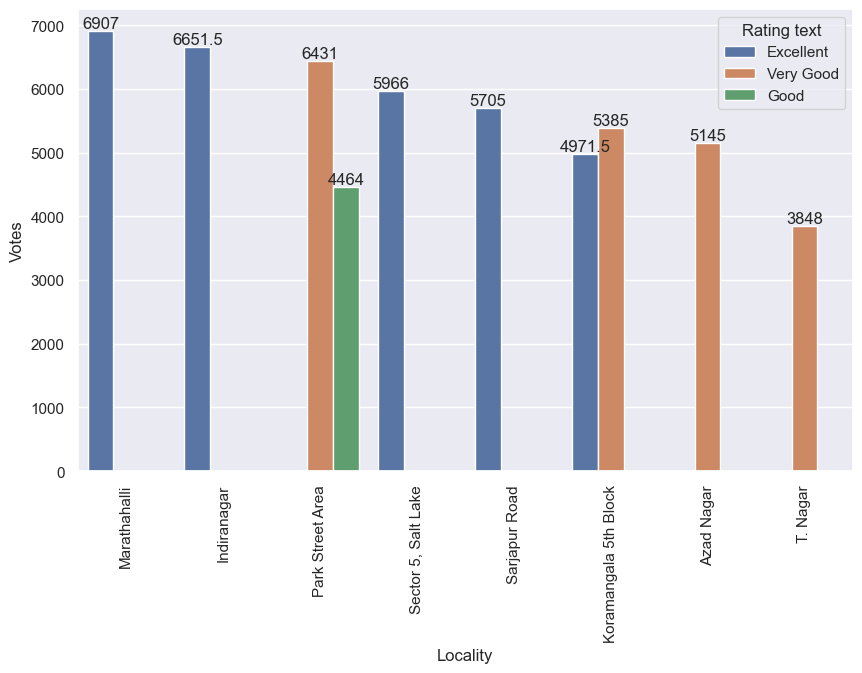

In [ ]:
plt.figure(figsize=(10,6))
Grouped_locations = geo_df.groupby(["Locality","Rating text"])["Votes"].mean().sort_values(ascending=False)[:10].reset_index()
ax = sns.barplot(Grouped_locations,x = "Locality" , y = "Votes" , hue = "Rating text")
for i in ax.containers:
    ax.bar_label(i)
plt.xticks(rotation=90)
plt.show()

#### **Top-10 Average of cost two distribution by location with rating text**

In [ ]:
geo_df["Average Cost for two"].min() , geo_df["Average Cost for two"].max()

(0, 800000)

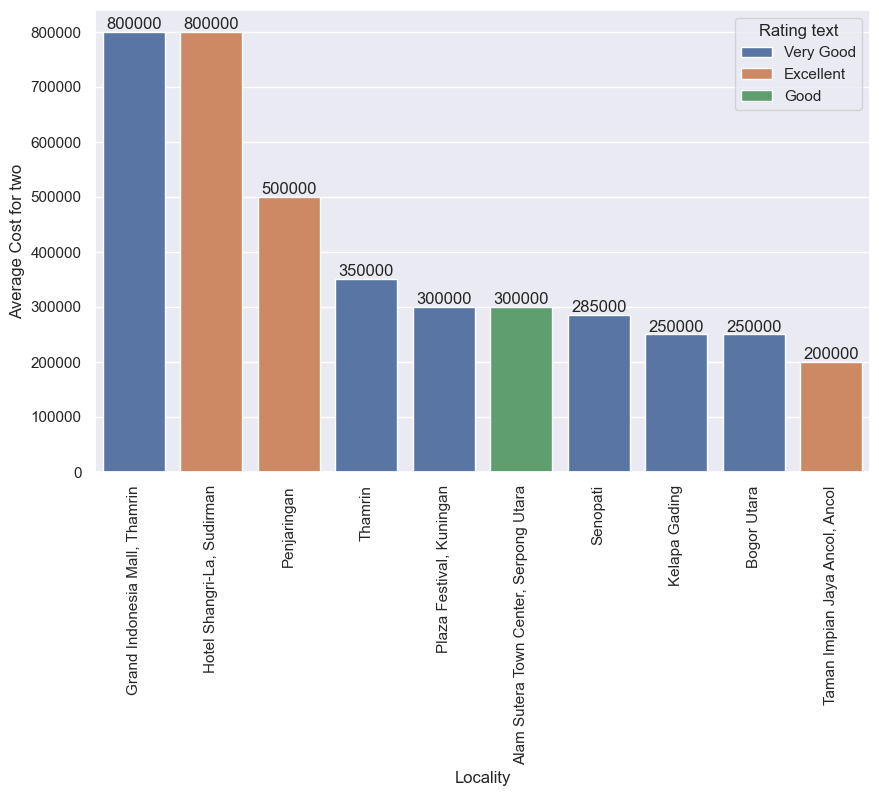

In [ ]:
plt.figure(figsize=(10,6))
Grouped_locations = geo_df.groupby(["Locality","Rating text"])["Average Cost for two"].mean().sort_values(ascending=False)[:10].reset_index()
ax = sns.barplot(Grouped_locations,x = "Locality" , y = "Average Cost for two" , hue = "Rating text")
for i in ax.containers:
    ax.bar_label(i)
plt.xticks(rotation=90)
plt.show()

#### **Top-10 Currency distribution by location with price range**

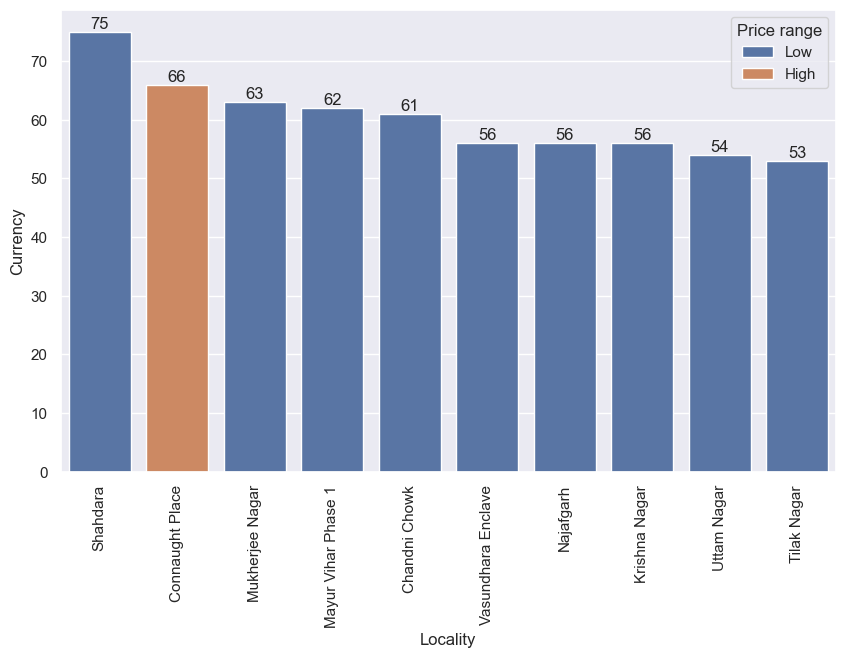

In [ ]:
plt.figure(figsize=(10,6))
Grouped_locations = geo_df.groupby(["Locality","Price range"])["Currency"].count().sort_values(ascending=False)[:10].reset_index()
ax = sns.barplot(Grouped_locations,x = "Locality" , y = "Currency" , hue = "Price range")
for i in ax.containers:
    ax.bar_label(i)
plt.xticks(rotation=90)
plt.show()